# California Housing Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing(as_frame=True)
# df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
# df['Target'] = cal_housing.target
df = cal_housing.frame

In [2]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.columns
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
df = df[selected_features]

In [5]:
# import geopy
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']['postcode']
# geolocator = geopy.Nominatim(user_agent='my_application')

# df = pd.DataFrame({
#     'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
#     'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
# })

# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


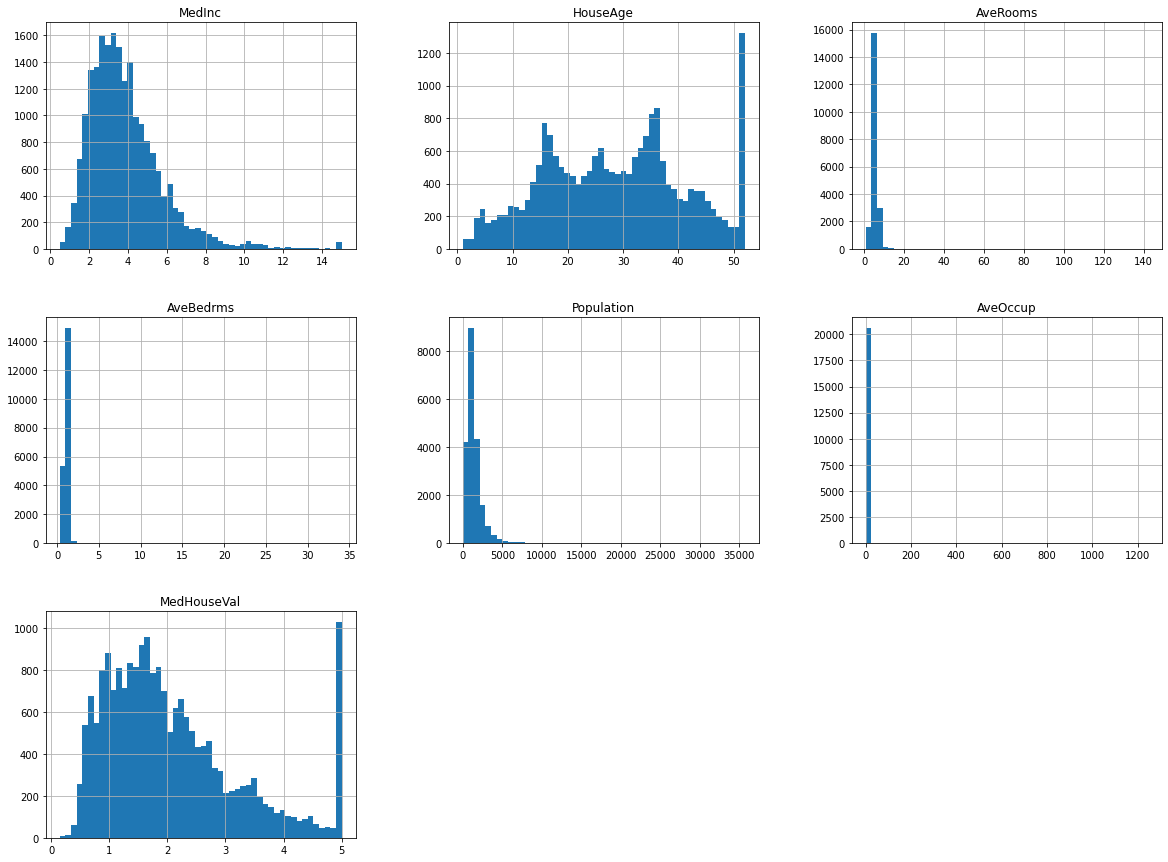

In [7]:
df.hist(bins=50, figsize=(20,15));

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   MedHouseVal  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


### OUTLIER REMOVAL

From the count plots above we can see that there are a few outliers in the data.

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


In [11]:
df = remove_outlier_IQR(df)

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,19959.000000,20640.000000,20129.000000,19216.000000,19444.000000,19929.000000,19569.000000
mean,3.657296,28.639486,5.238801,1.048147,1226.546081,2.841571,1.908523
std,1.488482,12.585558,1.154132,0.066104,641.655194,0.626707,0.954386
min,0.499900,1.000000,2.032738,0.866013,3.000000,1.161290,0.149990
25%,2.536900,18.000000,4.426656,1.004348,767.000000,2.416216,1.162000
50%,3.469800,29.000000,5.197183,1.044503,1121.000000,2.793017,1.732000
75%,4.593800,37.000000,5.983759,1.088694,1596.000000,3.221258,2.467000
max,8.011300,52.000000,8.469738,1.239521,3132.000000,4.560748,4.822000


In [18]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,NaN,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [14]:
df.corr()['MedHouseVal']

MedInc         0.626620
HouseAge       0.061480
AveRooms       0.259047
AveBedrms     -0.103628
Population     0.017072
AveOccup      -0.238426
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [17]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg.coef_

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values